# OPTION CHAIN ANALYSIS

Aim : To find the insights based on options chain data that is available on NSE.

### Setting Up Environment

In [1]:
# Libraries for Data
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
# Custom Library made for analysing option chains
from importlib.machinery import SourceFileLoader
oal = SourceFileLoader('option_analysis_library','option_analysis_library.py').load_module()

In [3]:
# Libraries For Visualisation
import plotly as pt
import plotly.express as px

### Preparing Data For Analytical Purpose

In [4]:
raw_oi_dataframe = pd.read_csv('Data/BN_2024Jan25_Expiry_2024Jan31.csv')
raw_oi_dataframe

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,...,BID QTY.1,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1
0,3.0,-,2.0,-,7299.00,-500.05,105.0,7514.35,7799.40,105.00,...,8085.0,1.15,1.20,19920.00,1.15,1.20,48.74,35776.00,24002.00,24002.0
1,2.0,-,3.0,-,6791.15,-371.80,750.0,7014.45,7299.45,105.00,...,5400.0,1.20,1.25,15750.00,-1.75,1.25,45.50,50633.00,28868.00,28945.0
2,8.0,3.00,11.0,-,6291.85,-280.10,105.0,6521.60,6799.20,105.00,...,900.0,1.40,1.90,870.00,-1.15,1.90,44.04,3068.00,1000.00,1092.0
3,17.0,12.00,34.0,-,5750.00,-415.90,750.0,6015.70,6298.80,105.00,...,26205.0,1.45,1.50,13290.00,-1.55,1.50,39.93,63400.00,36167.00,36212.0
4,6.0,-,3.0,-,5294.40,-467.60,750.0,5529.35,5800.15,105.00,...,5160.0,1.85,2.50,1980.00,1.30,2.50,37.95,2544.00,1052.00,1052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2838.0,2151.00,3084.0,48.73,2.40,-2.70,150.0,2.40,2.75,900.00,...,750.0,8186.20,8402.30,30.00,538.90,8645.95,96.40,40.00,24.00,47.0
107,22630.0,18420.00,35248.0,50.33,2.55,-1.70,15.0,2.45,2.60,750.00,...,750.0,8635.55,9457.20,750.00,386.80,9048.70,88.47,4.00,1.00,16.0
108,2674.0,2674.00,3758.0,52.08,1.95,-24.55,885.0,1.95,2.10,915.00,...,150.0,9251.85,9812.65,750.00,213.00,9340.25,-,8.00,4.00,21.0
109,39944.0,39944.00,56760.0,54.08,2.20,-15.80,465.0,2.15,2.20,795.00,...,750.0,9354.45,10313.95,750.00,209.45,9834.20,-,8.00,4.00,18.0


`oi_retriever` function is used below to get option contracts that are near BANKNIFTY close. 

In [ ]:
processed_oi_data = oal.oi_retriever(raw_oi_dataframe,'^NSEBANK')

In [8]:
processed_oi_data

,STRIKE,BID QTY,BID,ASK,ASK QTY,CHNG,LTP,IV,VOLUME,CHNG IN OI,OI,CE/PE
0,43900CE,120.0,1255.55,1395.55,750.0,-176.90,1355.10,26.92,907.0,89.0,194.0,CE
1,44000CE,15.0,1224.15,1272.00,15.0,-166.85,1268.35,26.30,37420.0,3949.0,5981.0,CE
2,44100CE,15.0,1150.00,1194.80,120.0,-173.05,1178.55,25.02,4843.0,343.0,926.0,CE
3,44200CE,225.0,1067.95,1092.25,90.0,-182.65,1078.95,23.61,10634.0,381.0,570.0,CE
4,44300CE,60.0,965.40,1029.35,105.0,-206.25,975.20,23.26,20720.0,1671.0,1989.0,CE
5,44400CE,15.0,910.00,937.10,105.0,-204.80,910.00,22.30,67797.0,3617.0,4104.0,CE
6,44500CE,270.0,816.75,837.60,855.0,-186.15,837.60,21.38,339043.0,22237.0,31226.0,CE
7,44600CE,240.0,748.25,759.95,15.0,-191.25,759.95,21.04,263540.0,10023.0,11890.0,CE
8,44700CE,30.0,660.00,689.65,330.0,-186.20,689.65,21.08,242584.0,9791.0,13934.0,CE
9,44800CE,60.0,591.75,620.75,90.0,-198.55,605.80,20.40,336277.0,19984.0,26313.0,CE


### Analyzing Options Performance

`overall_information` : plot the pie chart of total call and put option contract volumes

In [6]:
oal.overall_information(option_contracts=processed_oi_data)

`option_performance` :
  - Input : Processed Option Contracts data and label for call/put contracts
  - Output : Shows Various graphs
     1. Pie Chart of Call/Put overall bid VS. ask
     2. Bar Graph : Represents Change In Open Interest(OI) for Indiviual STRIKE
     3. Bar Graph : Represents Change In Price (%) for Indiviual STRIKE
     4. Grouped Bar Chart: Represents Bid VS. ASK for INDIVIDUAL STRIKE

In [7]:
oal.option_peformance(processed_oi_data,'CE')

In [12]:
oal.option_peformance(processed_oi_data,'PE')

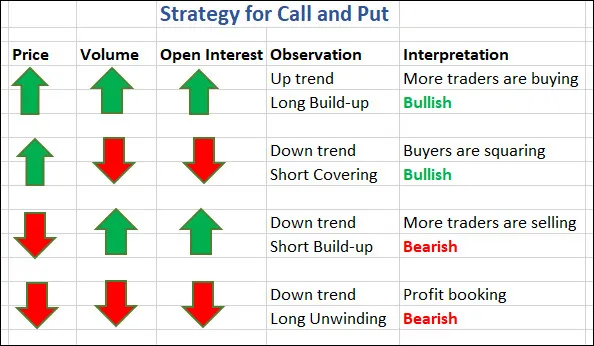